# Árboles de decisión

## Equipo 3

- Carlos Geovanny Perez Velazquez
- Santiago Battezzati
- Carolina Acosta Tovany 

El objetivo de esta tarea consiste en resolver problemas de clasificación y problemas de regresión con árboles de decisión.

Probaremos con el set de datos de bateadores que se utilizó en clase.

**CaRT** considera cortes binarios óptimos para cada atributo 

Utiliza el índice Gini para evaluar la impureza de S

$$ G(S) = 1 - \sum_{k=1}^{K}p_k^2
$$

$p_k$ es la probabilidad de que un registro arbitrario en S pertenezca a la clae $C_k$

$$IG(S, A) = G(S) - \frac{|S_1|}{|S|} G(S_1) - \frac{|S_2|}{|S|} G(S_2) $$

### Librerias utilizadas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## our own CART class
import cart

np.random.seed(seed=1)

#### Importamos nuestro set de datos hitters

In [2]:
hitters = pd.read_csv("data/Hitters.csv", usecols=['Years','Hits','Salary'])

In [3]:
hitters = hitters.dropna()

In [4]:
hitters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hits    263 non-null    int64  
 1   Years   263 non-null    int64  
 2   Salary  263 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 8.2 KB


### Salario de batedores

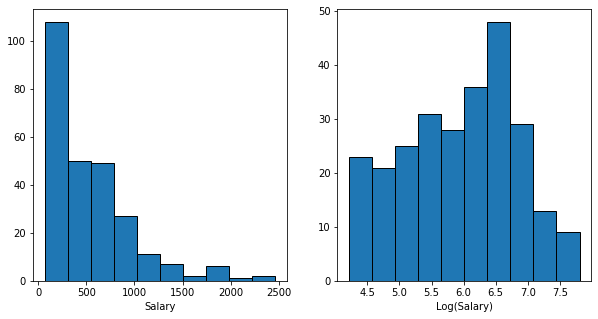

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.hist(hitters.Salary, ec='black')
ax1.set_xlabel('Salary')
ax2.hist(np.log(hitters.Salary), ec='black')
ax2.set_xlabel('Log(Salary)')
plt.show()

In [6]:
## Transformamos el salario a log10(salario)
hitters['Salary'] = np.log(hitters['Salary']).round(1) ## Transform salary to Salary log

### Separamos nuestro set de datos en entrenamiento y prueba con un 10% de pruebas

In [7]:
## Split dataset
train_data, test_data = train_test_split(hitters, test_size = 0.1, random_state = 42) 

Convertimos a listas para manejarlas de forma más fácil 

In [8]:
header = list(train_data.columns) ## Get column headers
train_data = train_data.values.tolist() ## Transform df to list of lists
test_data = test_data.values.tolist()

#### Utilizaremos una profundidad de 3

In [9]:
depth = 3
clf = cart.CART(header, depth) ## Depht can also be omitted

### Buscamos cuál es la mejor pregunta para hacerse

In [10]:
clf.find_best_split(train_data)[1] ## Find the best question to ask

Years >= 4.0

Entrenamos...

In [11]:
my_tree = clf.fit(train_data) ## Fit our CART

In [12]:
clf.print_tree(my_tree) ## Print CART

 Years >= 4.0
 --> True:
   Hits >= 94.0
   --> True:
     Years >= 14.0
     --> True:
       Predict {7.5: '5.56%', 6.8: '16.67%', 6.3: '11.11%', 6.6: '5.56%', 6.7: '22.22%', 6.9: '16.67%', 6.2: '5.56%', 7.3: '11.11%', 6.1: '5.56%'}
     --> False:
       Predict {5.2: '1.11%', 6.4: '10.0%', 6.2: '4.44%', 6.6: '14.44%', 5.0: '1.11%', 6.7: '6.67%', 6.5: '4.44%', 7.8: '2.22%', 6.0: '4.44%', 4.5: '2.22%', 7.6: '3.33%', 6.8: '5.56%', 4.6: '2.22%', 6.9: '5.56%', 7.5: '2.22%', 7.2: '4.44%', 7.0: '2.22%', 7.1: '5.56%', 5.8: '2.22%', 6.3: '5.56%', 7.4: '1.11%', 4.7: '1.11%', 5.9: '2.22%', 5.6: '1.11%', 6.1: '1.11%', 5.3: '2.22%', 4.4: '1.11%'}
   --> False:
     Hits >= 47.0
     --> True:
       Predict {6.1: '13.11%', 6.0: '8.2%', 5.8: '6.56%', 5.7: '8.2%', 6.7: '3.28%', 6.2: '4.92%', 5.5: '14.75%', 5.9: '6.56%', 6.3: '1.64%', 6.6: '8.2%', 7.0: '3.28%', 5.6: '1.64%', 5.4: '4.92%', 7.2: '1.64%', 5.3: '3.28%', 4.7: '1.64%', 6.5: '3.28%', 6.4: '1.64%', 5.2: '1.64%', 4.9: '1.64%'}
     --> Fal

Ploteamos los límites y vemos que el árbol estratifica o segmenta a los jugadores en tres
regiones del espacio predictivo

$$R_1 = X Años < 4$$

$$R_2 = X Años ≥ 4, Hits < 120$$

$$R _3 = X Años ≥ 4, Hits ≥ 120$$

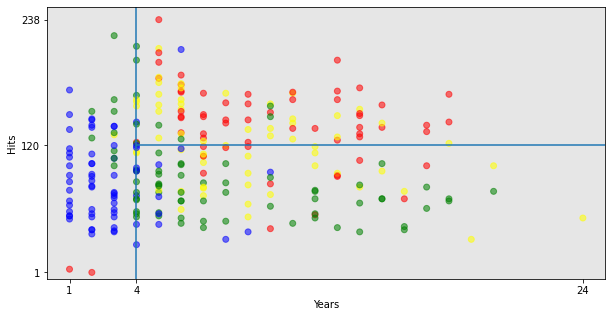

In [13]:
## plot decision boundaries
colors = ["blue","green","yellow","red"]
hitters['Salary_color'] = pd.qcut(hitters['Salary'], labels=colors, q=4)
fig,ax = plt.subplots(figsize=(10,5))
ax.set_facecolor((0.90, 0.90, 0.90))
plt.scatter(hitters.Years, hitters.Hits, c=hitters.Salary_color, alpha=.55)
plt.xlim(0,25)
plt.ylim(ymin=-5)
plt.xticks([1, 4, 24])
plt.yticks([1, 120, 238])
plt.vlines(4, ymin=-5, ymax=250)
plt.hlines(120, xmin=4, xmax=25)
plt.xlabel("Years")
plt.ylabel("Hits")
plt.show()

### Prueba de clasificación con el set de pruebas

In [14]:
## Classification with test data
for row in test_data:
    print(f"Actual: {row[-1]}. Predicted: {clf.classify(row, my_tree)}")

Actual: 6.7. Predicted: 6.7
Actual: 5.6. Predicted: 6.7
Actual: 6.8. Predicted: 6.7
Actual: 5.0. Predicted: 6.7
Actual: 5.6. Predicted: 5.2
Actual: 5.6. Predicted: 6.0
Actual: 5.3. Predicted: 6.7
Actual: 4.9. Predicted: 5.1
Actual: 6.2. Predicted: 6.7
Actual: 5.8. Predicted: 6.0
Actual: 6.4. Predicted: 6.7
Actual: 6.7. Predicted: 7.5
Actual: 5.6. Predicted: 5.2
Actual: 5.0. Predicted: 6.2
Actual: 5.7. Predicted: 6.7
Actual: 6.6. Predicted: 6.7
Actual: 7.1. Predicted: 6.7
Actual: 4.6. Predicted: 4.6
Actual: 7.4. Predicted: 6.7
Actual: 6.2. Predicted: 6.7
Actual: 6.6. Predicted: 6.0
Actual: 5.9. Predicted: 6.2
Actual: 6.4. Predicted: 6.7
Actual: 6.3. Predicted: 6.7
Actual: 5.5. Predicted: 6.7
Actual: 4.5. Predicted: 4.6
Actual: 6.6. Predicted: 7.5


In [15]:
## Classification with test data
y_pred = [clf.classify(row, my_tree) for row in train_data]
y_train = [row[-1] for row in train_data]

Ploteamos las predicciones

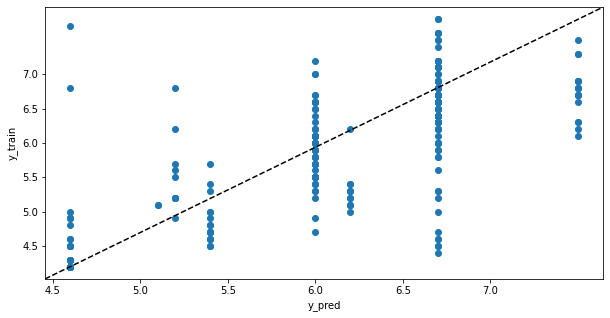

In [16]:
## Plot predictions
fig,ax = plt.subplots(figsize=(10,5))
plt.scatter(y_pred, y_train)
plt.plot([0, 1], [0, 1], '--k', transform = plt.gca().transAxes)
plt.xlabel('y_pred')
plt.ylabel('y_train')
plt.xticks([4.5, 5, 5.5, 6.0, 6.5, 7.0])
plt.yticks([4.5, 5, 5.5, 6.0, 6.5, 7.0])
plt.show()

El error que tenemos es de ..

In [17]:
## Calculate MSE
mean_squared_error(y_train, y_pred)

0.5179237288135594